In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Sharpening using smooth filters




> We've seen that smooth filters are used to blur and remove info from the image.
<br>
In this part your task is to do the opposite ! Use them to actually make the image sharper



- hint: $$
g_{\text{sharp}} = f + \gamma \left( f - h_{\text{blur}} * f \right)
$$


uint8
uint8
uint8


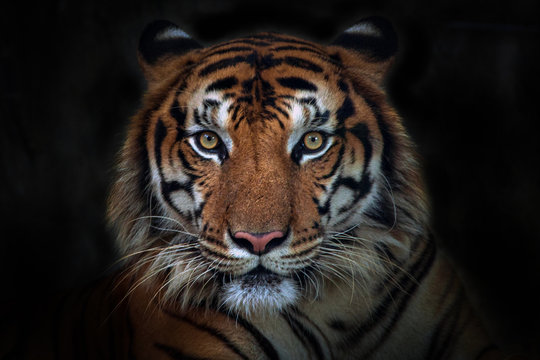

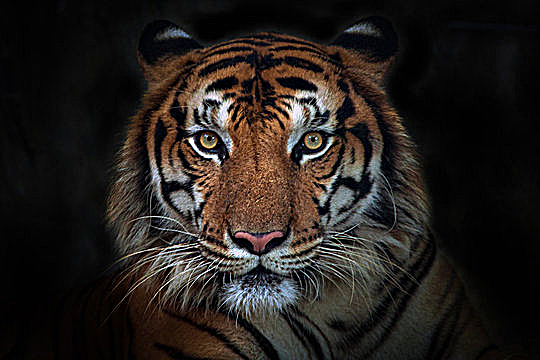

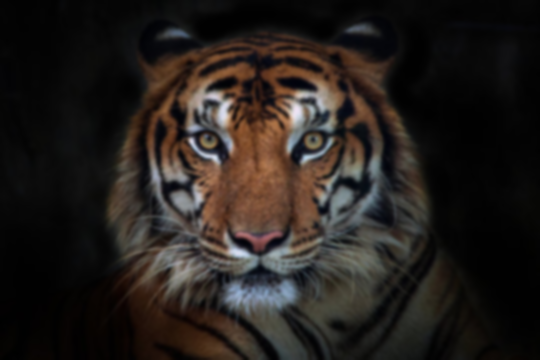

In [14]:

def sharpen_image(image, kernel_size=(7, 7), gamma=2):
  # TODO: Apply a smoothing filter (e.g., Gaussian blur)
  gaussian_image = cv2.GaussianBlur(image , kernel_size , 0)
  image = image.astype(np.float32)
  # TODO: Calculate the difference between the original and blurred image
  difference = image - gaussian_image
  # TODO: Apply the gamma factor
  difference = gamma * difference
  # TODO:
  # Add the sharpened detail back to the original image
  result = image + difference
  result = np.clip(result , 0 , 255).astype(np.uint8)
  #gaussian_image = np.clip(result , 0 , 255).astype(np.uint8)
  #result = cv2.addWeighted(image , 1 , difference , 0.5 , 0)
  # Convert sharpened_detail to the same data type as the original image
  #pass # return the sharp image and the blur one
  return result , gaussian_image


image = cv2.imread('tiger.jpg')
print(image.dtype)
if image is not None:
  sharpened_img, blur = sharpen_image(image)
  print(sharpened_img.dtype)
  print(blur.dtype)
  # image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
  # #sharpened_image = cv2.cvtColor(sharpened_img , cv2.COLOR_BGR2RGB)
  # blur = cv2.cvtColor(blur , cv2.COLOR_BGR2RGB)
  # plt.figure(figsize=(18 , 6))
  # plt.subplot(1 , 3 ,1)
  # plt.imshow(image)
  # plt.title("Original image")
  # plt.axis('off')
  # plt.subplot(1 , 3, 2)
  # plt.imshow(sharpened_img)
  # plt.title("Sharpened image")
  # plt.axis('off')
  # plt.subplot(1 , 3 , 3)
  # plt.imshow(blur)
  # plt.title("Blur")
  # plt.axis('off')

  # plt.tight_layout()
  # plt.show()
  cv2_imshow(image)
  cv2_imshow(sharpened_img)
  cv2_imshow(blur)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
else:
  print("Error: Could not load image.")

# Morphological Edge Detection

- Extract clean object boundaries by subtracting eroded image from its dilated version


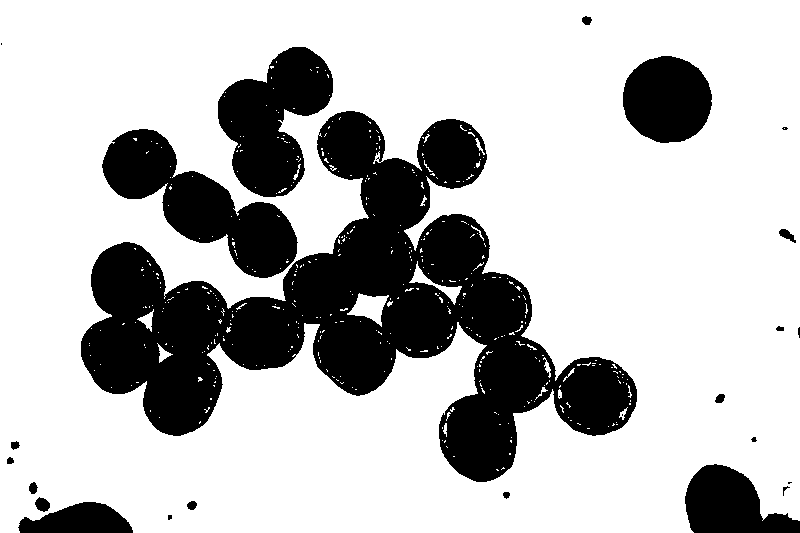

Morphological edges:



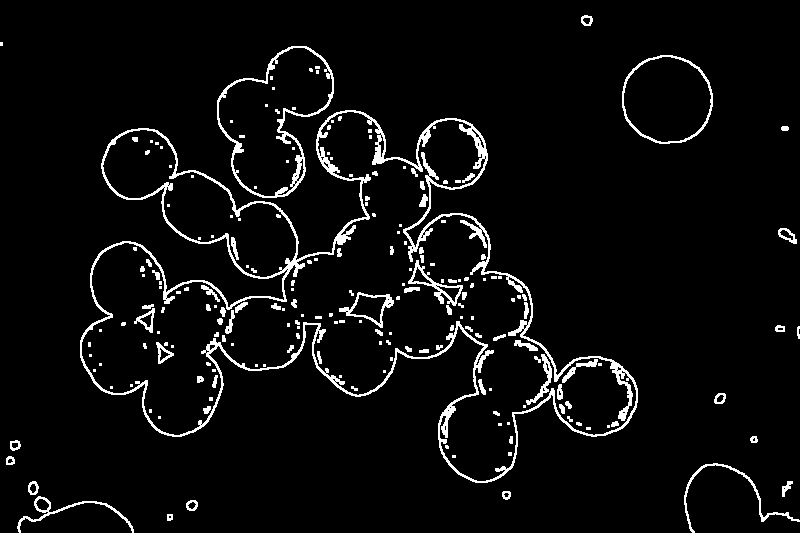

Cleaned edges:



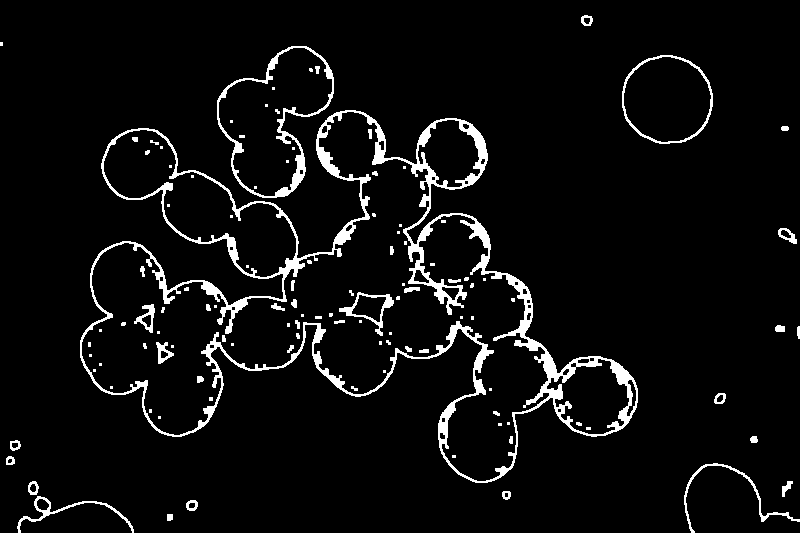

In [21]:
#####I don't know if I wrote this cell correctly or not, I'm just completing this task based on my own knowledge and what I learned from my research!!
# Read the image
img = cv2.imread("bacteria.jpg", cv2.IMREAD_GRAYSCALE)
# For black and white image:
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# TODO: Morphological edge detection (dilate and then erode and then ...)
kernel = np.ones((3,3) , np.uint8)
dilated_image = cv2.dilate(binary , kernel , 1)
eroded_image = cv2.erode(binary , kernel , 1)
edges = cv2.absdiff(dilated_image , eroded_image)

# TODO: clean edges with morphological closing
closing_kernel = np.ones((3,3) , np.uint8)
cleaned_edge = cv2.morphologyEx(edges , cv2.MORPH_CLOSE , closing_kernel)
# TODO: Show results
cv2_imshow(binary)
print("Morphological edges:\n")
cv2_imshow(edges)
print("Cleaned edges:\n")
cv2_imshow(cleaned_edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Count bacteria



> Add blockquote



bonus:
- find a way to calculate the kernel size automatically (based on overlaps or cell sizes for example)
- reconstruct cells by dilation after counting them

Number of bacteria: 25


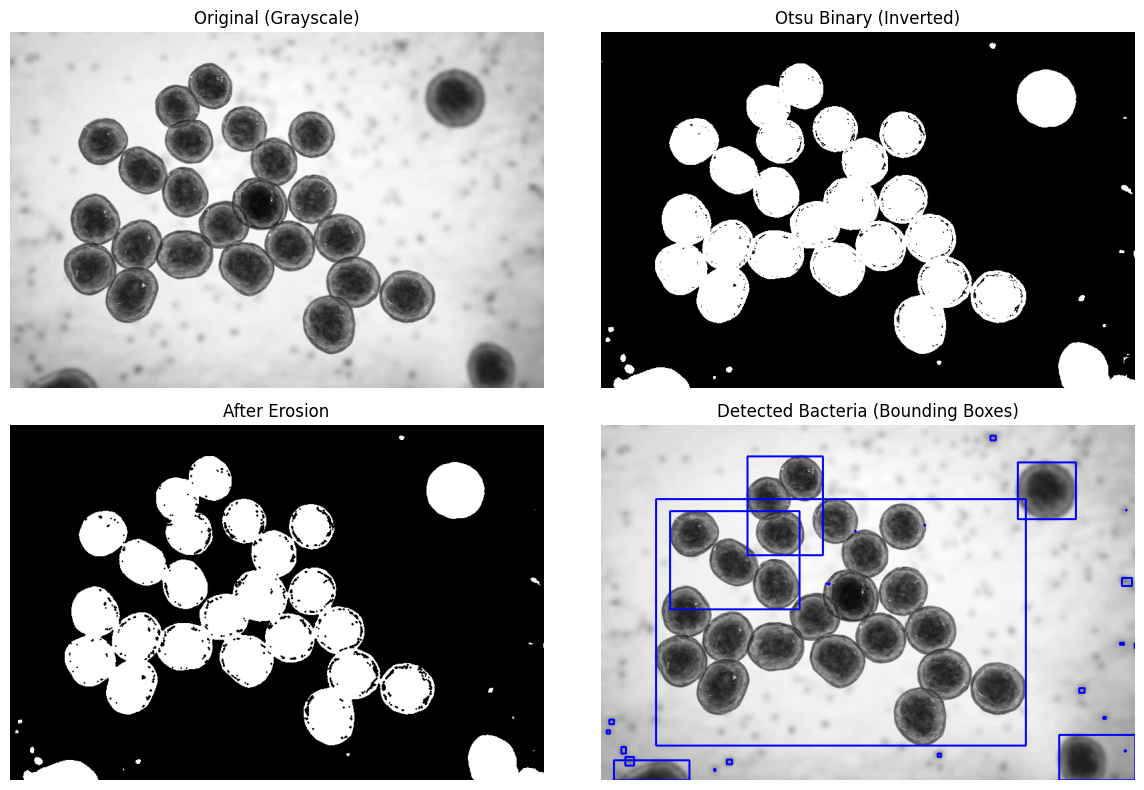

In [36]:
# Load image (grayscale)
img = cv2.imread("bacteria.jpg", cv2.IMREAD_GRAYSCALE)

# Otsu thresholding
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Flip the colors (for morphology)
binary = cv2.bitwise_not(binary)

# Erosion to remove small noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
eroded = cv2.erode(binary, kernel, iterations=1)

# Connected component analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(eroded)

# Print the number of components (excluding background)
print("Number of bacteria:", num_labels - 1)

# Draw results (Boxes around bacteria)
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    cv2.rectangle(output, (x, y), (x+w, y+h), (0, 0, 255), 2)

# Display results
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original (Grayscale)")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(binary, cmap='gray')
plt.title("Otsu Binary (Inverted)")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(eroded, cmap='gray')
plt.title("After Erosion")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(output)
plt.title("Detected Bacteria (Bounding Boxes)")
plt.axis("off")

plt.tight_layout()
plt.show()


# Optional



> Learn as much as you want about CNNs and ask mentors (CNNs will be taught in future sessions)



# Sources:
- Computer Vision: Algorithms and Applications
- Dr. Karimi videos
- Google
- My own knowledge